In [34]:
#Importing libraries
import gensim
from gensim.models import Word2Vec
import pandas as pd
import spacy
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [35]:
nlp=spacy.load('en_core_web_sm')

In [36]:
#Read the test file
with open ("test.txt") as file:
    text=file.read().replace('\n','') 

In [37]:
#Parse the text into spacy model
doc=nlp(text)

In [38]:
sentences = gensim.models.word2vec.LineSentence("test.txt")

In [40]:
# train model
model=Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
data=model.most_similar('Neural')
print(data)
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=297, size=100, alpha=0.025)
['What', 'is', 'a', 'Neural', 'Network?', 'A', 'neural', 'network', 'series', 'of', 'algorithms', 'that', 'endeavors', 'to', 'recognize', 'underlying', 'relationships', 'in', 'set', 'data', 'through', 'process', 'mimics', 'the', 'way', 'human', 'brain', 'operates.', 'In', 'this', 'sense,', 'networks', 'refer', 'systems', 'neurons,', 'either', 'organic', 'or', 'artificial', 'nature.', 'can', 'adapt', 'changing', 'input;', 'so', 'generates', 'best', 'possible', 'result', 'without', 'needing', 'redesign', 'output', 'criteria.', 'The', 'concept', 'networks,', 'which', 'has', 'its', 'roots', 'intelligence,', 'swiftly', 'gaining', 'popularity', 'development', 'trading', 'systems.', 'Basics', 'Networks', 'world', 'finance,', 'assist', 'such', 'as', 'time-series', 'forecasting,', 'algorithmic', 'trading,', 'securities', 'classification,', 'credit', 'risk', 'modeling', 'and', 'constructing', 'proprietary', 'indicators', 'price', 'derivatives.', 'works'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


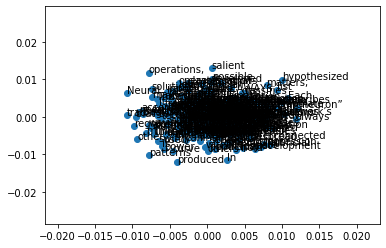

In [41]:
##Plot the Word2vec Vocab

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
